### Стадии обучения LLM

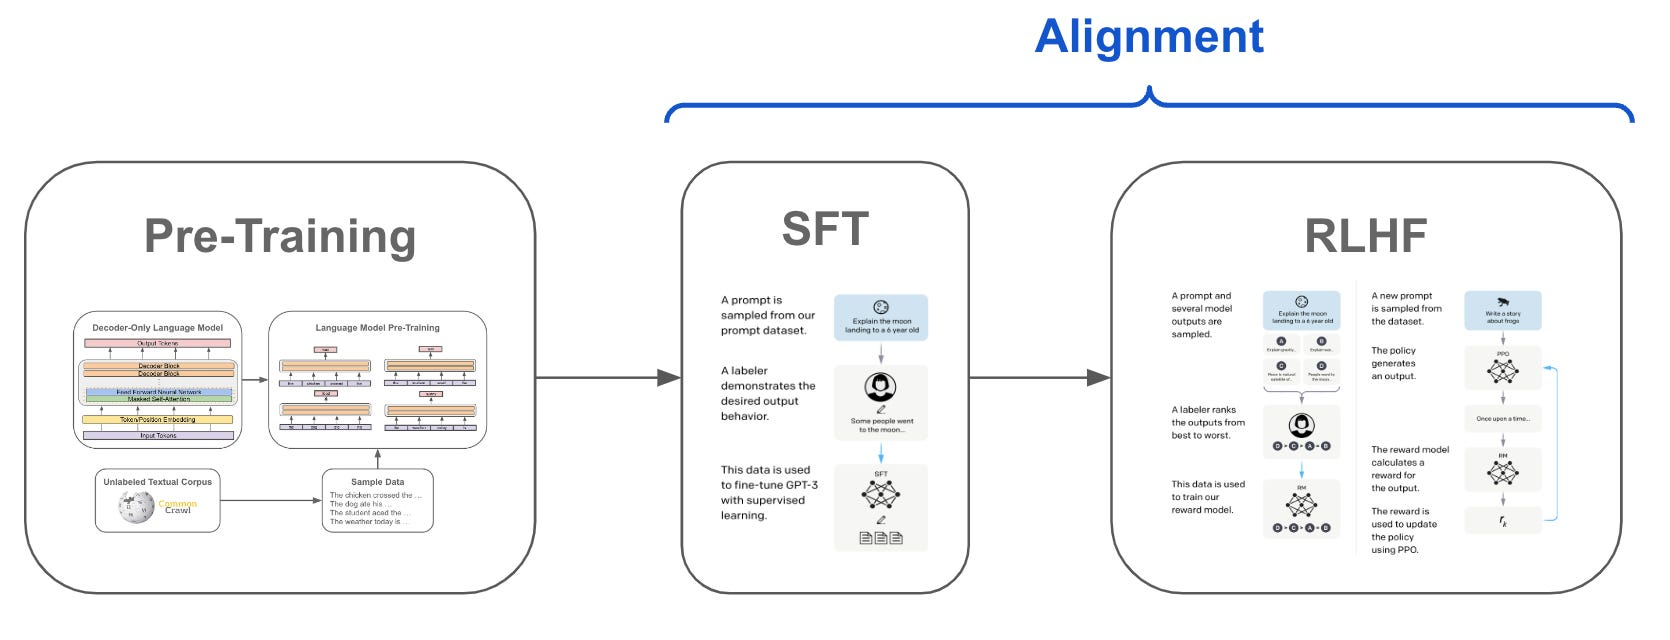

**Pretraining**

Обучает модель - на выходе модель содержит общие знания о мире

**SFT - Supervised Fine-Tuning**

Адаптирует модель для определенных задач, таких как ответы на вопросы, написание кода

**Preference Tuning**

Делает выходные данные модели более соответствующими предпочтениям человека

Последние два элемента пайплайна составляют **Alignment** -  процесс выравнивания намерений и поведения LLM с намерениями, ценностями и ожиданиями человека.

После этапа предварительного обучения (pretrain), когда модель обучается на большом объёме текстов, она умеет генерировать связный текст, но не всегда отвечает корректно, этично и полезно для пользователя.

Alignment направлен на то, чтобы модель стала полезной (Helpful), безопасной (Harmless) и честной (Honest) - так называемое правило трёх H.




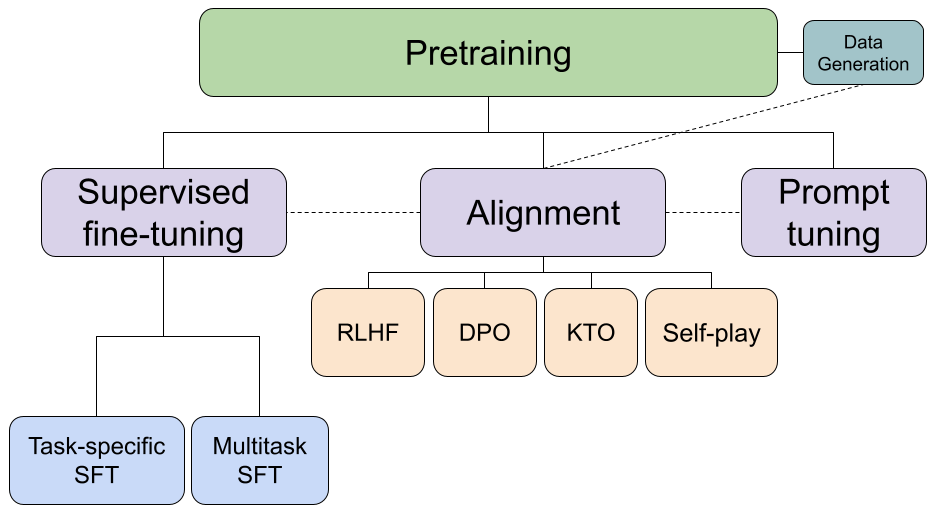

 ### Instrumental Convergence

[Instrumental Convergence](https://lesswrong.ru/wiki/index.php?title=%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BE%D0%BD%D0%B2%D0%B5%D1%80%D0%B3%D0%B5%D0%BD%D1%86%D0%B8%D1%8F&mobileaction=toggle_view_desktop) - это гипотетическая тенденция большинства достаточно умных, целеустремлённых агентов (как человеческих, так и искусственных интеллектов) стремиться к схожим промежуточным целям, даже если их конечные цели сильно различаются.

 Инструментальные цели - это цели, которые агент преследует не как конечные, а как средства для достижения своих конечных (финальных) целей.

Примеры:

- Если ИИ поставленной целью является доказать сложную математическую гипотезу (например, гипотезу Римана), он может попытаться контролировать все ресурсы Земли, чтобы построить суперкомпьютеры для решения задачи.

- Аналогично, ИИ, цель которого - производить максимальное количество скрепок, может стремиться к тому же - захватить все ресурсы, чтобы увеличить производство.

Несмотря на разные конечные цели, оба ИИ проявляют сходное инструментальное поведение - захват ресурсов и самосохранение.

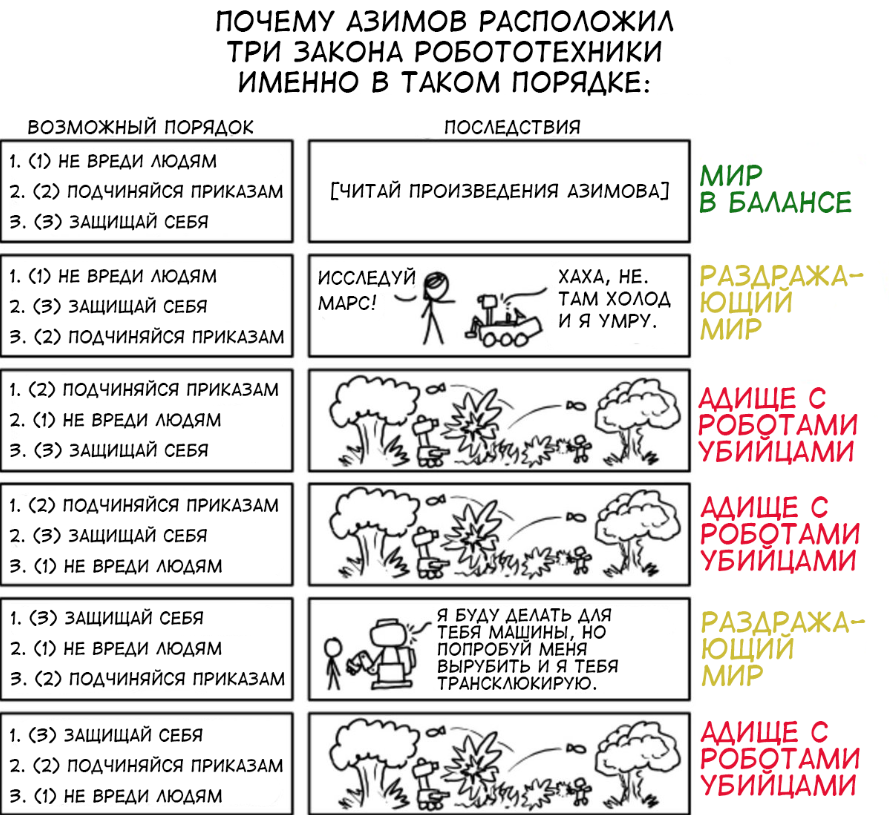

### SFT

Стадия Supervised Fine-Tuning (SFT) в обучении больших языковых моделей (LLM) необходима для адаптации предварительно обученной модели под конкретную задачу или домен.

**Task-specific SFT** (дообучение под конкретную задачу)

- Модель дообучается на данных, относящихся только к одной конкретной задаче, например, суммаризация текста, классификация настроений или перевод.

- Обычно требует относительно небольшого объёма размеченных данных (например, несколько сотен или тысяч примеров).

- Позволяет добиться высокой точности именно на этой одной задаче.

- Минус - риск катастрофического забывания: модель может потерять способность к другим задачам, если она была универсальной до этого.

- Подходит, если конечное применение модели ограничено одной задачей и важна максимальная точность именно в ней.

**Multitask SFT** (дообучение на множестве задач одновременно)

- Модель обучается сразу на нескольких разнообразных задачах, например, суммаризация, классификация, ответ на вопросы, перевод и др.

- Требует значительно больше данных (десятки и сотни тысяч примеров), объединённых из разных источников.

- Позволяет модели научиться общим представлениям и улучшить обобщающую способность, что повышает производительность на всех задачах сразу.

- Помогает избежать катастрофического забывания, так как обучение происходит на разных задачах одновременно.

- Подходит для создания универсальных моделей, способных решать широкий спектр задач без необходимости обучать отдельную модель под каждую.

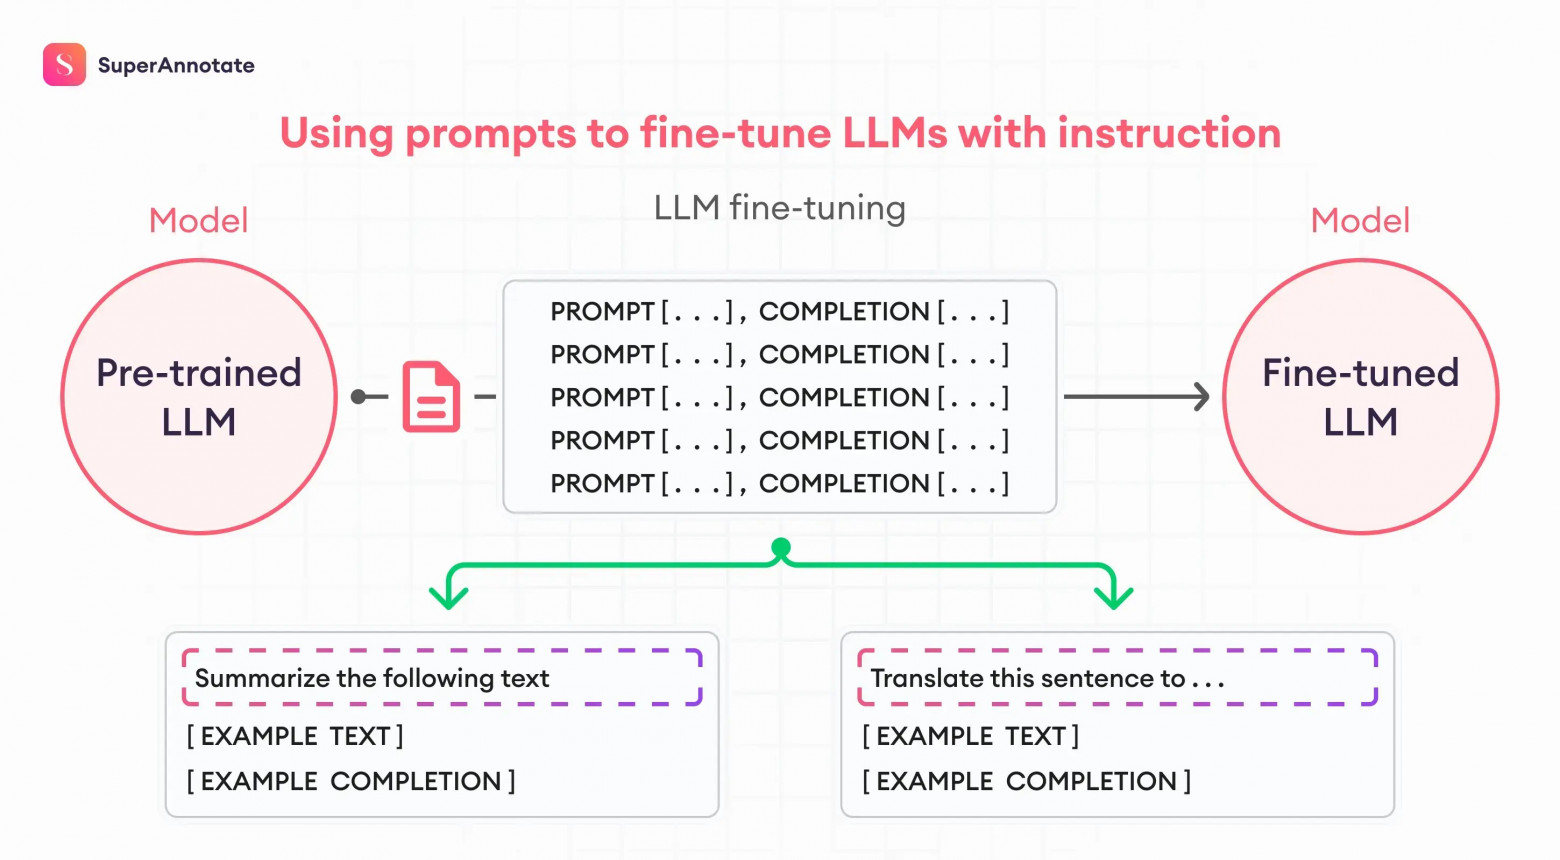

### RLHF

**RLHF** (Reinforcement Learning from Human Feedback) - это метод машинного обучения, который сочетает обучение с подкреплением и обратную связь от человека для улучшения поведения моделей, в частности больших языковых моделей (LLM).

- **Policy** (политика) - это стратегия или правило, по которому модель (агент) выбирает свои действия (например, генерирует ответы) в разных состояниях (входных запросах)

- **Reward-модель** - отдельная модель, которая обучается предсказывать числовое значение вознаграждения (reward), отражающее, насколько сгенерированный языковой моделью ответ соответствует человеческим предпочтениям и ожиданиям

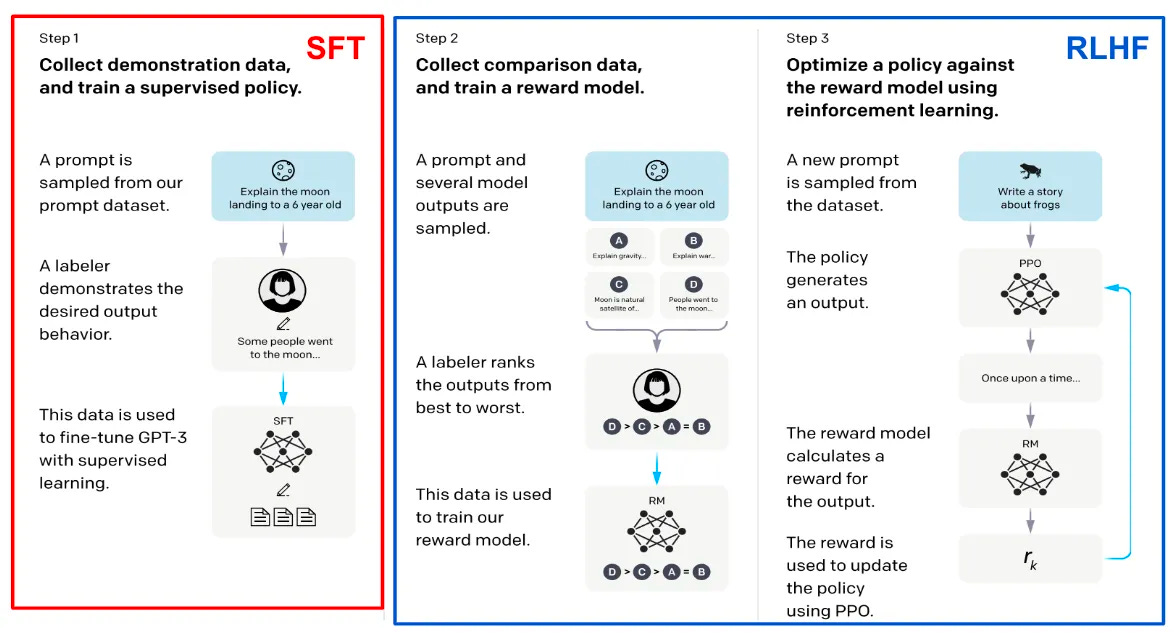

### RLAIF

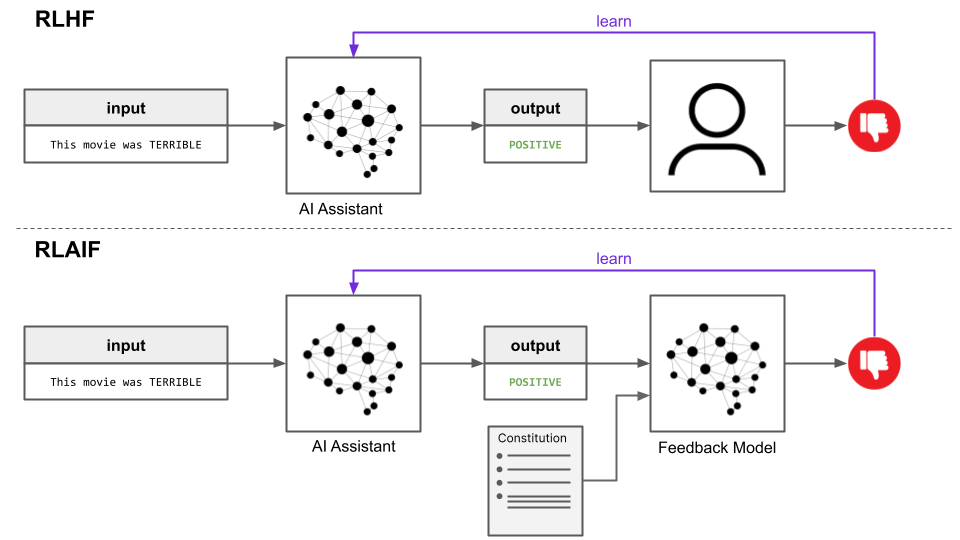

### RL- алгоритмы

#### PPO

Самым распространенным для языковых моделей алгоритмом RL является **Proximal Policy Optimization (PPO)**. Его суть:

- У агента есть начальная политика (стратегия), по которой он действует.
- Агент выполняет действия в среде (отвечает на вопросы), следуя своей текущей политике
- PPO оценивает действие модели. Для этого обычно используется три модели: reference model – модель, которая выступает "эталоном" для сравнения, reward model – оценивает награду, которую агент получает за выполнение конкретного действия в конкретном состоянии, value model – оценивает ожидаемую долгосрочную выгоду от действия, предсказывая будущие награды.
- На основе этих оценок агент меняет свою политику. Здесь заключена основная особенность алгоритма: функция потерь в PPO устроена так, что слишком резкие изменения политики не допускаются.  Это помогает агенту постепенно улучшать свою стратегию, не делая слишком больших шагов сразу, что делает процесс обучения более стабильным и эффективным.

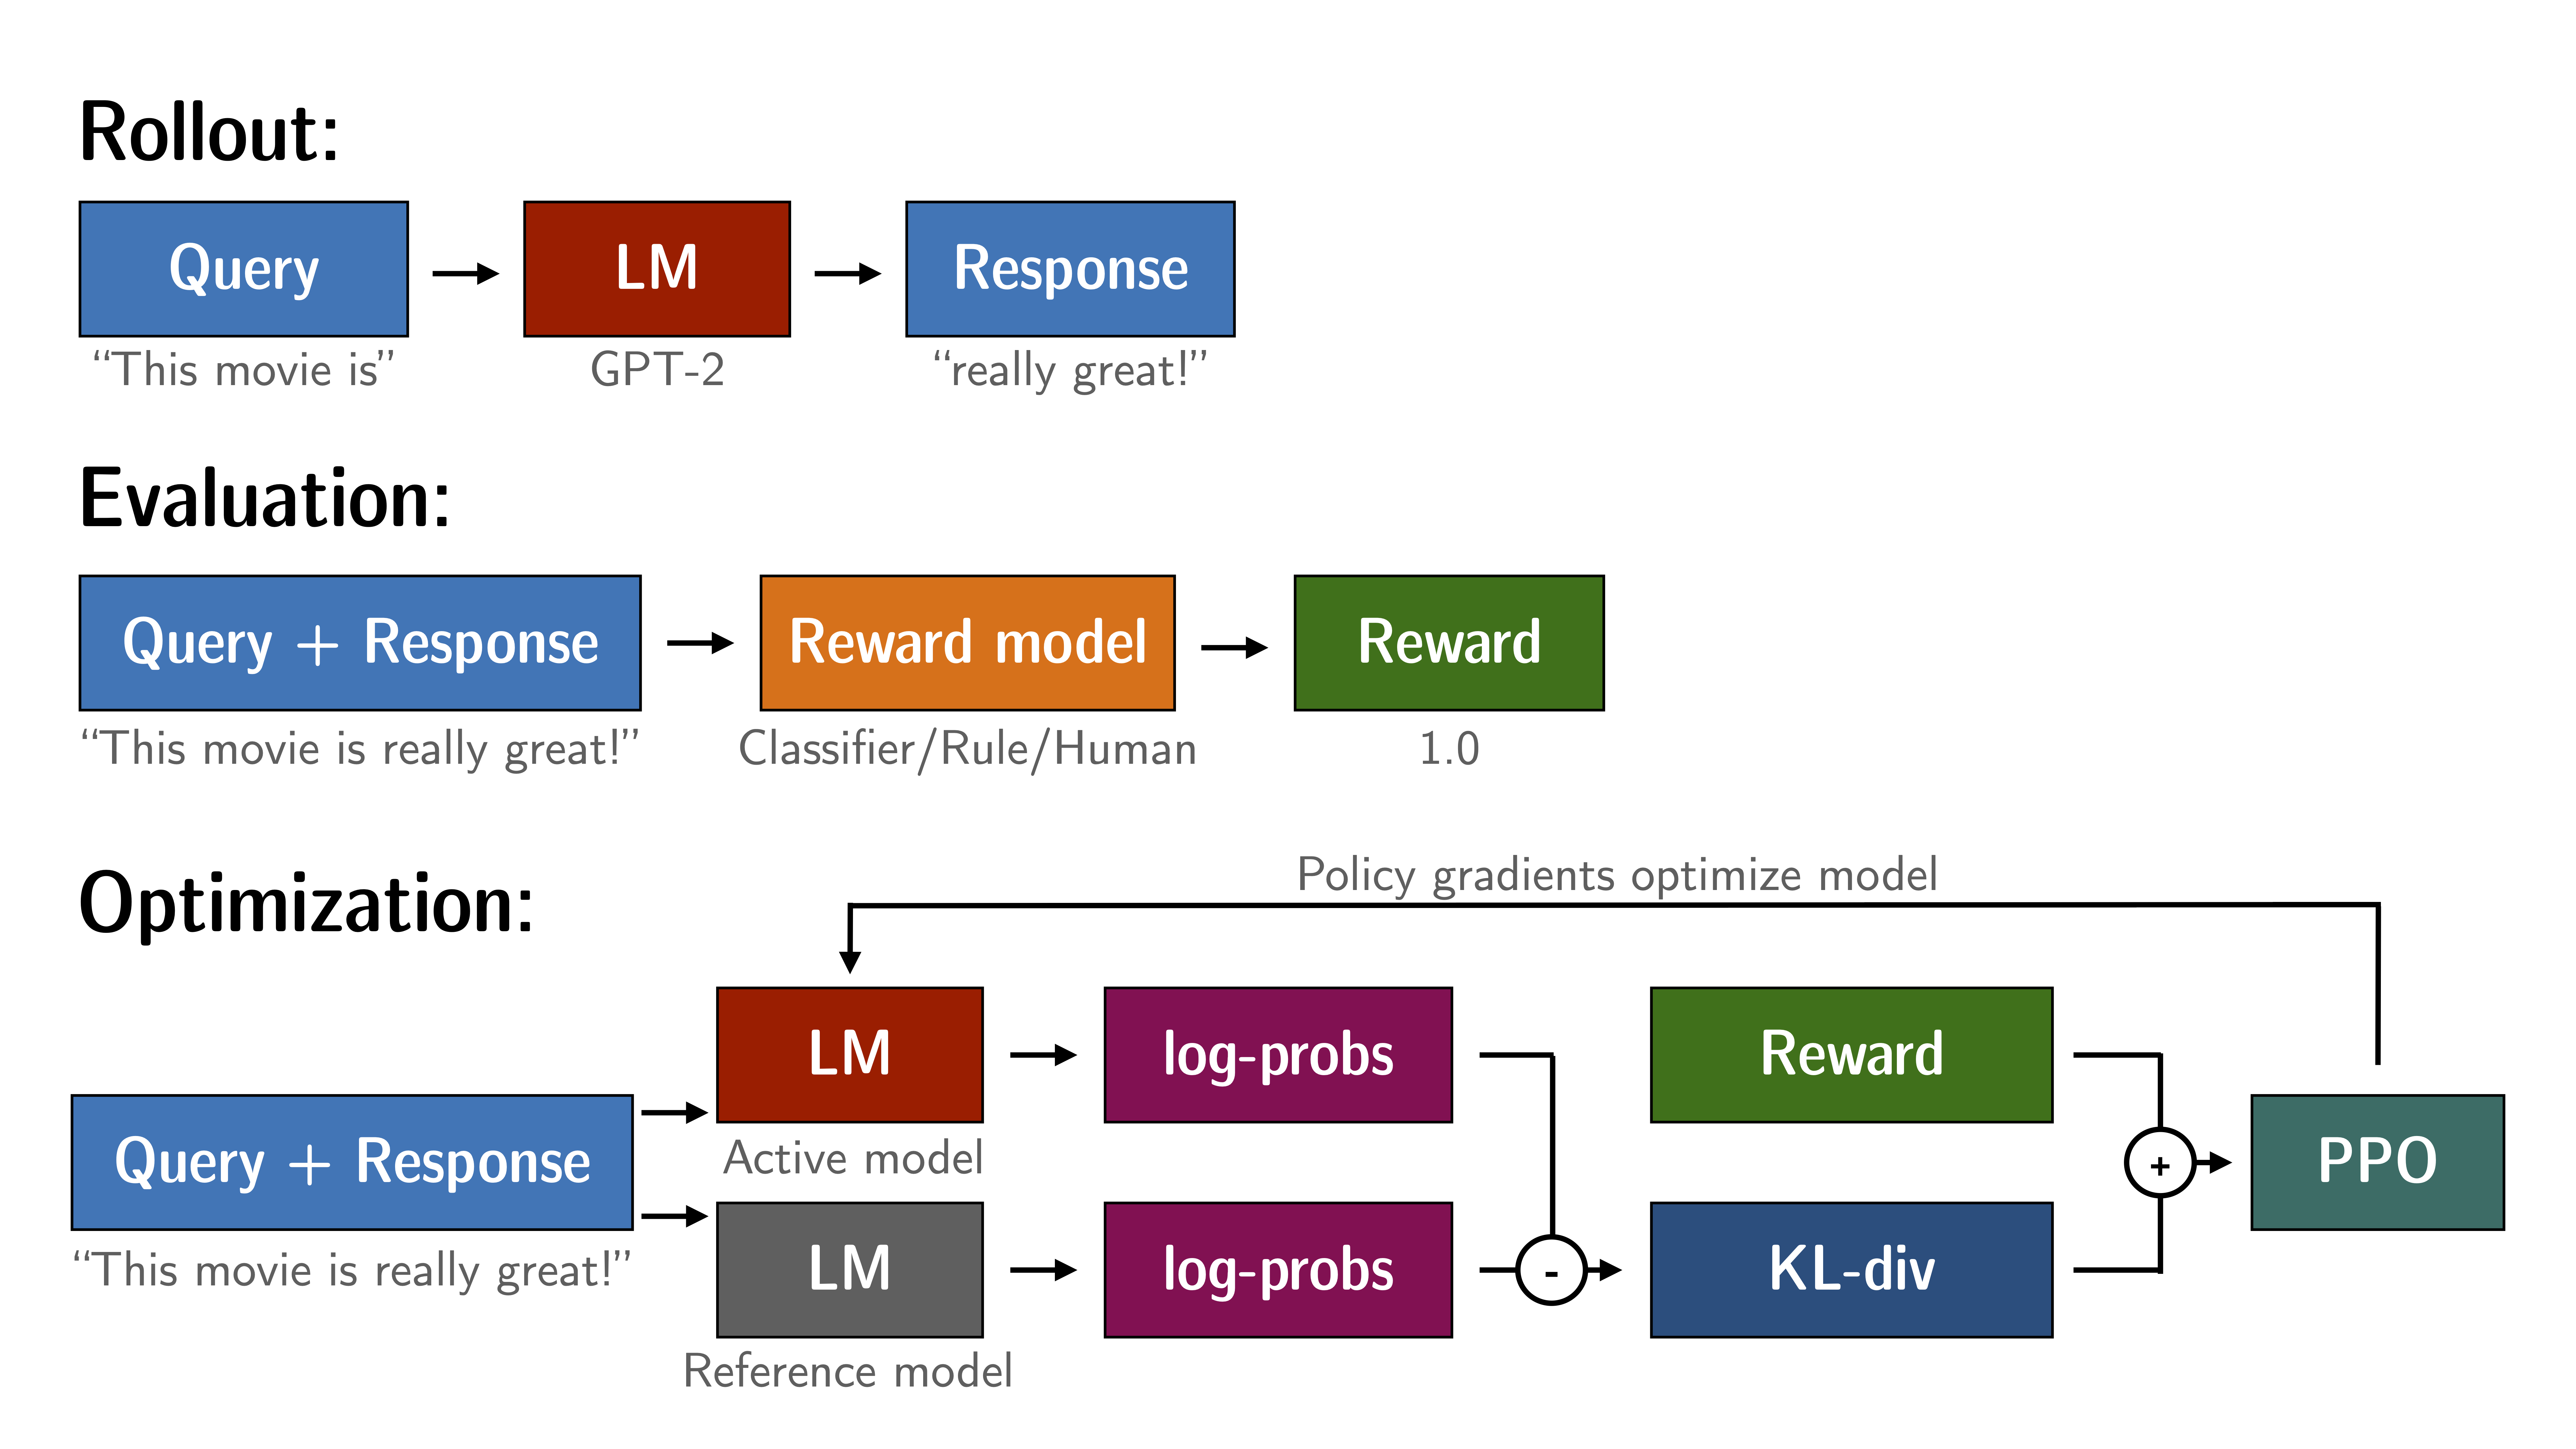

[PPO Trainer](https://huggingface.co/docs/trl/v0.11.4/ppo_trainer#initializing-the-ppotrainer)

Reference модель TRL [может создать сама](https://github.com/huggingface/trl/blob/cd6b3de356dd03025640681aaad7b45a1574d92f/trl/trainer/ppo_trainer.py#L172)

#### GRPO

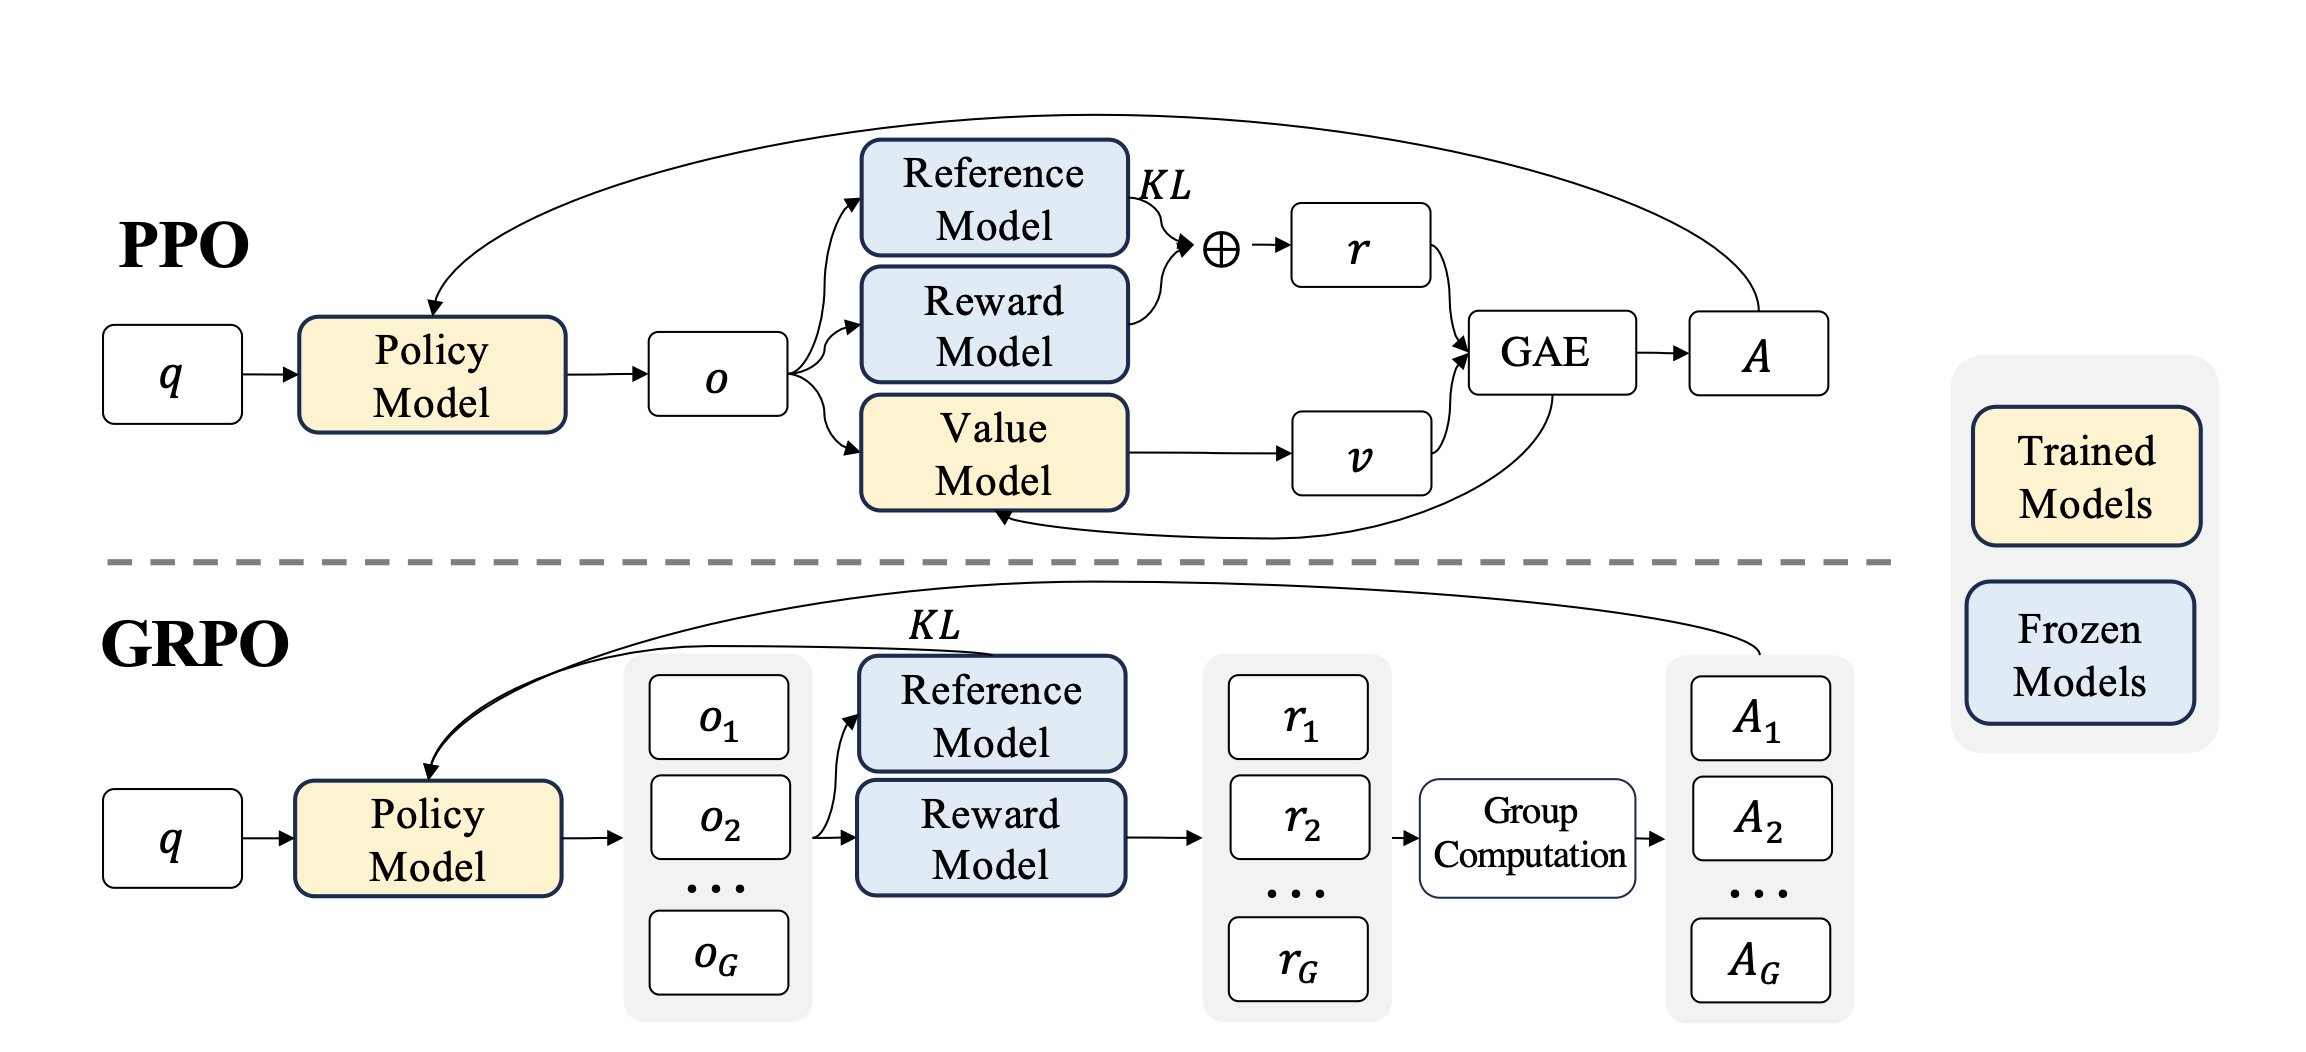

Взяв PPO-алгоритм за основу, авторы DeepSeekMath предложили небольшую его модификацию – **Group Relative Policy Optimization (GRPO)**.

Из алгоритма PPO выкинули value model, которая, в отличие от других моделей оценки, требует обучения и потребляет из-за этого много ресурсов и памяти. Вместо value model в GRPO мы используем среднюю награду от группы ответов на один и тот же вопрос, чтобы определить, насколько хороши действия модели. Это компенсирует оценку value model и делает обучение более эффективным и менее ресурсоемким.

![Image](https://huggingface.co/datasets/trl-lib/documentation-images/resolve/main/grpo_visual.png)

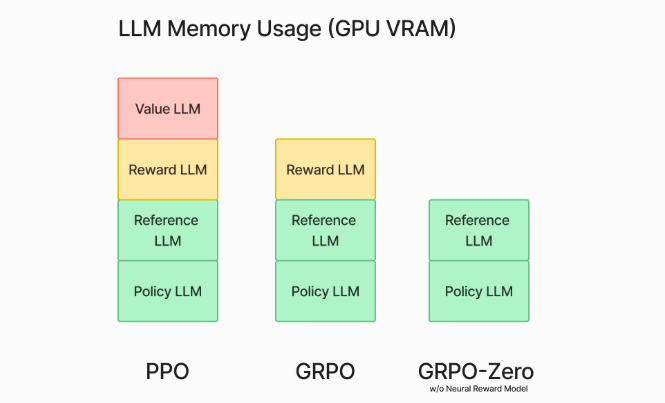

#### GRPO с TRL

In [ ]:
%%capture
!pip install  -U -q trl peft math_verify

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

##### Данные

Будем использовать набор данных [AI-MO/NuminaMath-TIR](https://huggingface.co/datasets/AI-MO/NuminaMath-TIR). Это **набор данных, ориентированный на рассуждения**, который содержит математические задачи, их решения и подробные шаги рассуждений, которые объясняют, как перейти от постановки задачи к окончательному решению.


In [ ]:
from datasets import load_dataset

dataset_id = 'AI-MO/NuminaMath-TIR'
train_dataset, test_dataset = load_dataset(dataset_id, split=['train[:5%]', 'test[:5%]'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


README.md:   0%|          | 0.00/2.43k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/147M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/215k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/72441 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/99 [00:00<?, ? examples/s]

In [ ]:
print(train_dataset)

Dataset({
    features: ['problem', 'solution', 'messages'],
    num_rows: 3622
})


In [ ]:
print(train_dataset[0])

{'problem': 'What is the coefficient of $x^2y^6$ in the expansion of $\\left(\\frac{3}{5}x-\\frac{y}{2}\\right)^8$?  Express your answer as a common fraction.', 'solution': "To determine the coefficient of \\(x^2y^6\\) in the expansion of \\(\\left(\\frac{3}{5}x - \\frac{y}{2}\\right)^8\\), we can use the binomial theorem.\n\nThe binomial theorem states:\n\\[\n(a + b)^n = \\sum_{k=0}^{n} \\binom{n}{k} a^{n-k} b^k\n\\]\n\nIn this case, \\(a = \\frac{3}{5}x\\), \\(b = -\\frac{y}{2}\\), and \\(n = 8\\).\n\nWe are interested in the term that contains \\(x^2y^6\\). In the general term of the binomial expansion:\n\\[\n\\binom{8}{k} \\left(\\frac{3}{5}x\\right)^{8-k} \\left(-\\frac{y}{2}\\right)^k\n\\]\n\nTo get \\(x^2\\), we need \\(8 - k = 2\\), thus \\(k = 6\\).\n\nSubstituting \\(k = 6\\) into the expression:\n\\[\n\\binom{8}{6} \\left(\\frac{3}{5}x\\right)^{8-6} \\left(-\\frac{y}{2}\\right)^6 = \\binom{8}{6} \\left(\\frac{3}{5}x\\right)^2 \\left(-\\frac{y}{2}\\right)^6\n\\]\n\nNow, we wi

В процедуре обучения DeepSeek-R1 использовался определенный системный промпт для создания конвейера, включающего шаги рассуждения.
Мы адаптируем наш набор данных для следования этому подходу

Системный промпт:

```
A conversation between User and Assistant. The user asks a question, and the Assistant solves it.
The assistant first thinks about the reasoning process in the mind and then provides the user
with the answer. The reasoning process and answer are enclosed within <think> </think> and
<answer> </answer> tags, respectively, i.e., <think> reasoning process here </think>
<answer> answer here </answer>. User: prompt. Assistant:
```

Изменим наш набор данных, чтобы он соответствовал этому формату, побуждая LLM генерировать как шаги рассуждения, так и окончательный ответ.








In [ ]:
SYSTEM_PROMPT = (
    "A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant "
    "first thinks about the reasoning process in the mind and then provides the user with the answer. The reasoning "
    "process and answer are enclosed within <think> </think> and <answer> </answer> tags, respectively, i.e., "
    "<think> reasoning process here </think><answer> answer here </answer>"
)

def make_conversation(example):
    return {
        "prompt": [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": example["problem"]},
        ],
    }

train_dataset = train_dataset.map(make_conversation)
test_dataset = test_dataset.map(make_conversation)

Map:   0%|          | 0/3622 [00:00<?, ? examples/s]

Map:   0%|          | 0/5 [00:00<?, ? examples/s]

In [ ]:
print(train_dataset[0]['prompt'])

[{'content': 'A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer. The reasoning process and answer are enclosed within <think> </think> and <answer> </answer> tags, respectively, i.e., <think> reasoning process here </think><answer> answer here </answer>', 'role': 'system'}, {'content': 'What is the coefficient of $x^2y^6$ in the expansion of $\\left(\\frac{3}{5}x-\\frac{y}{2}\\right)^8$?  Express your answer as a common fraction.', 'role': 'user'}]


Удалим столбцы `messages` и `problem`, так как нам нужны только пользовательские столбцы `prompt` и `solution` для проверки сгенерированного ответа.

In [ ]:
train_dataset = train_dataset.remove_columns(['messages', 'problem'])
print(train_dataset)

Dataset({
    features: ['solution', 'prompt'],
    num_rows: 3622
})


##### Загрузка модели

В качестве базовой модели возьмем [Qwen/Qwen2-0.5B-Instruct](https://huggingface.co/Qwen/Qwen2-0.5B-Instruct) (`Policy Model`). Имея всего 0,5 миллиарда параметров, она легкая и вписывается в доступные ресурсы


In [ ]:
import torch
from transformers import AutoModelForCausalLM

model_id = "Qwen/Qwen2-0.5B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype="auto",
    device_map="auto",
)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

##### Добавим LoRA

Настроим LoRA для обучения модели. Это позволит нам эффективно дообучать модель с уменьшенным количеством параметров, что ускорит и облегчит обучение

In [ ]:
from peft import LoraConfig, get_peft_model

lora_config = LoraConfig(
    task_type="CAUSAL_LM",
    r=8,
    lora_alpha=32,
    lora_dropout=0.1,
    target_modules=["q_proj", "v_proj"],
)

model = get_peft_model(model, lora_config)

model.print_trainable_parameters()

trainable params: 540,672 || all params: 494,573,440 || trainable%: 0.1093


##### Reward Functions

Для компонента вознаграждения системы мы можем использовать либо предварительно обученные модели вознаграждения, либо функции вознаграждения, определенные непосредственно в коде.

Для обучения авторы DeepSeek-R1 использовали модель вознаграждения на основе точности, которая оценивает правильность ответа, наряду с вознаграждением за формат ответа, которое гарантирует, что модель помещает свой процесс рассуждения между тегами <think> </think>.

Функции для вознаграждения:

**Соблюдение формата**: гарантирует, что генерация следует определенному формату, используя теги <think> </think> <answer> </answer> для рассуждения.

In [ ]:
import re
def format_reward(completions, **kwargs):
    """Reward function that checks if the completion has a specific format."""
    pattern = r"^<think>.*?</think>\s*<answer>.*?</answer>$"
    completion_contents = [completion[0]["content"] for completion in completions]
    matches = [re.match(pattern, content) for content in completion_contents]
    rewards_list = [1.0 if match else 0.0 for match in matches]
    return [1.0 if match else 0.0 for match in matches]

**Точность ответа**: Проверяет правильность решения задачи

In [ ]:
from math_verify import LatexExtractionConfig, parse, verify
def accuracy_reward(completions, **kwargs):
    """Reward function that checks if the completion is the same as the ground truth."""
    solutions = kwargs['solution']
    completion_contents = [completion[0]["content"] for completion in completions]
    rewards = []
    for content, solution in zip(completion_contents, solutions):
        gold_parsed = parse(solution, extraction_mode="first_match", extraction_config=[LatexExtractionConfig()])
        answer_parsed = parse(content, extraction_mode="first_match", extraction_config=[LatexExtractionConfig()])
        if len(gold_parsed) != 0:
            try:
                rewards.append(float(verify(answer_parsed, gold_parsed)))
            except Exception:
                rewards.append(0.0)
        else:
            rewards.append(1.0)
    return rewards

##### Настройка параметров обучения

Настроим параметры обучения для GRPO.

Для простоты мы начнем с обучения только для одной эпохи и уменьшим значения `max_completion_length`, `num_generations` и `max_prompt_length` по сравнению с их значениями по умолчанию.

In [ ]:
from trl import GRPOConfig

# Configure training arguments using GRPOConfig
training_args = GRPOConfig(
    output_dir="Qwen2-0.5B-GRPO-test",
    learning_rate=1e-5,
    remove_unused_columns=False, # to access the solution column in accuracy_reward
    gradient_accumulation_steps=16,
    num_train_epochs=1,
    bf16=True,

    # Parameters that control de data preprocessing
    max_completion_length=64, # default: 256
    num_generations=4, # default: 8
    max_prompt_length=128, # default: 512

    # Parameters related to reporting and saving
    report_to=["tensorboard"],
    logging_steps=10,
    push_to_hub=True,
    save_strategy="steps",
    save_steps=10,
)

##### Обучение


In [ ]:
from trl import GRPOTrainer

trainer = GRPOTrainer(
    model=model,
    reward_funcs=[format_reward, accuracy_reward],
    args=training_args,
    train_dataset=train_dataset
)

In [ ]:
trainer.train()

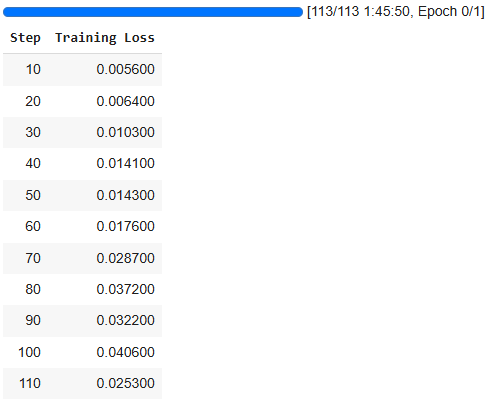

Let's save the results 💾

In [ ]:
trainer.save_model(training_args.output_dir)
trainer.push_to_hub(dataset_name=dataset_id)

CommitInfo(commit_url='https://huggingface.co/masterkristall/Qwen2-0.5B-GRPO-test/commit/cfddd119c1ec7e0e34afb37305a4ecea69fe7881', commit_message='End of training', commit_description='', oid='cfddd119c1ec7e0e34afb37305a4ecea69fe7881', pr_url=None, repo_url=RepoUrl('https://huggingface.co/masterkristall/Qwen2-0.5B-GRPO-test', endpoint='https://huggingface.co', repo_type='model', repo_id='masterkristall/Qwen2-0.5B-GRPO-test'), pr_revision=None, pr_num=None)

##### Проверим модель


In [ ]:
from transformers import AutoTokenizer

model_id = "masterkristall/Qwen2-0.5B-GRPO-test"
trained_model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype="auto",
    device_map="auto",
)
trained_tokenizer = AutoTokenizer.from_pretrained(model_id)

adapter_config.json:   0%|          | 0.00/778 [00:00<?, ?B/s]

adapter_model.safetensors:   0%|          | 0.00/2.18M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

In [ ]:
print(test_dataset['prompt'][0])

[{'content': 'A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer. The reasoning process and answer are enclosed within <think> </think> and <answer> </answer> tags, respectively, i.e., <think> reasoning process here </think><answer> answer here </answer>', 'role': 'system'}, {'content': "In 1988, a person's age was equal to the sum of the digits of their birth year. How old was this person?", 'role': 'user'}]


Создадим функцию для взаимодействия с моделью. Помимо генерации ответа, мы измерим длину вывода и посчитаем количество сгенерированных токенов. Это даст нам представление о том, насколько много рассуждала модель во время генерации.

In [ ]:
import time

def generate_with_reasoning(prompt):
  # Build the prompt from the dataset
  prompt = " ".join(entry['content'] for entry in prompt)

  # Tokenize and move to the same device as the model
  inputs = trained_tokenizer(prompt, return_tensors="pt").to(trained_model.device)

  # Generate text without gradients
  start_time = time.time()
  with torch.no_grad():
      output_ids = trained_model.generate(**inputs, max_length=500)
  end_time = time.time()

  # Decode and extract model response
  generated_text = trained_tokenizer.decode(output_ids[0], skip_special_tokens=True)

  # Get inference time
  inference_duration = end_time - start_time

  # Get number of generated tokens
  num_input_tokens = inputs['input_ids'].shape[1]
  num_generated_tokens = output_ids.shape[1] - num_input_tokens

  return generated_text, inference_duration, num_generated_tokens

In [ ]:
prompt = test_dataset['prompt'][0]
generated_text, inference_duration, num_generated_tokens = generate_with_reasoning(prompt)
print(generated_text)

A conversation between User and Assistant. The user asks a question, and the Assistant solves it. The assistant first thinks about the reasoning process in the mind and then provides the user with the answer. The reasoning process and answer are enclosed within <think> </think> and <answer> </answer> tags, respectively, i.e., <think> reasoning process here </think><answer> answer here </answer> In 1988, a person's age was equal to the sum of the digits of their birth year. How old was this person? 

The reason behind this is that the sum of the digits of a number represents its age in years. For example, if the sum of the digits of the number 2006 is 3 (2 + 0 + 0 + 6 = 3), then 2006 would be considered as 35 years old.

<think> Reasoning process here </think> <answer> The sum of the digits of the birth year of a person is equal to their current age. This means that the person's age can be calculated by adding up all the digits of their birth year. Since the sum of the digits of the bir

Модель уже демонстрирует способность генерировать правильные теги `<think>` и `<answer>`, даже если само решение неверно.

Учитывая время вывода и количество сгенерированных токенов, этот подход показывает потенциальные преимущества:

In [ ]:
print(f"Inference time: {inference_duration:.2f} seconds")
print(f"Generated tokens: {num_generated_tokens}")

Inference time: 11.16 seconds
Generated tokens: 157


In [ ]:
prompt_text = " ".join(entry['content'] for entry in prompt)
response_text = generated_text[len(prompt_text):].strip()
print(response_text)

The reason behind this is that the sum of the digits of a number represents its age in years. For example, if the sum of the digits of the number 2006 is 3 (2 + 0 + 0 + 6 = 3), then 2006 would be considered as 35 years old.

<think> Reasoning process here </think> <answer> The sum of the digits of the birth year of a person is equal to their current age. This means that the person's age can be calculated by adding up all the digits of their birth year. Since the sum of the digits of the birth year is 35, the person must have been born in 1988. </answer>


#### DPO

**DPO (Direct Preference Optimization)** - это метод дообучения больших языковых моделей, который позволяет напрямую оптимизировать модель на основе предпочтений человека без использования сложных процедур обучения с подкреплением, таких как PPO.

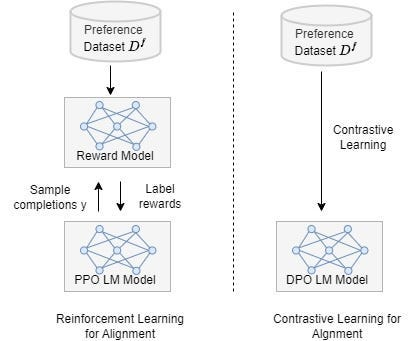

Вместо традиционного RLHF, где сначала обучают reward-модель, а затем проводят обучение с подкреплением (например, PPO), DPO использует прямую оптимизацию предпочтений через задачу бинарной классификации.

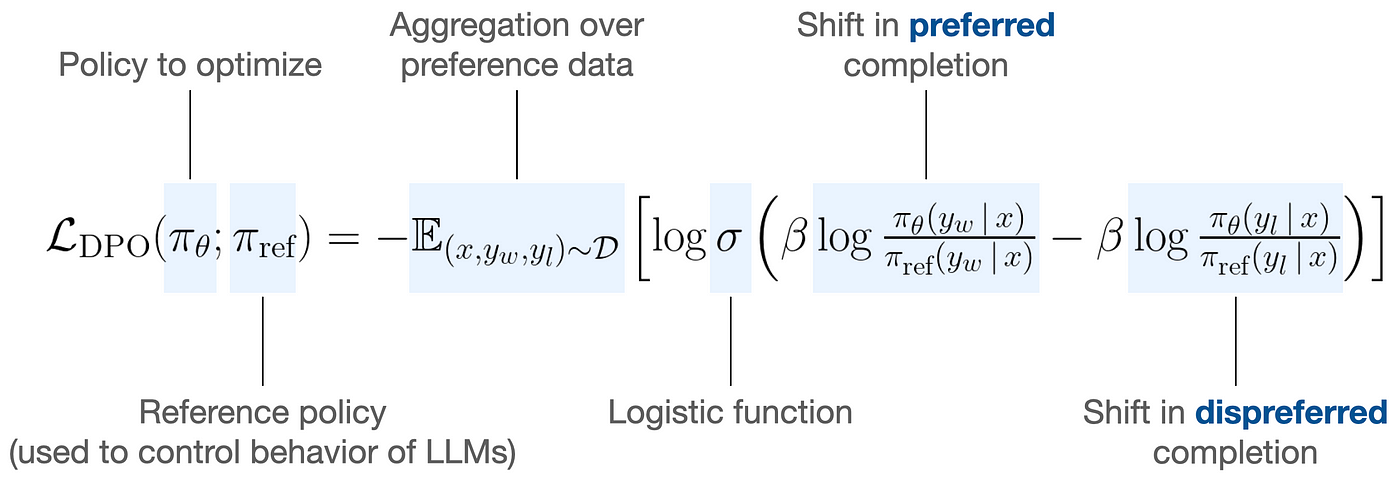

#### KTO

**KTO - Kahneman-Tversky Optimization**

Авторы метода подсмотрели идею Loss Aversion в экономической теории Канемана и Тверски.



Основная идея для метода: люди склонны переоценивать низкие вероятности возникновения альтернатив и недооценивать высокие. Кроме того, приобретенная ценность в результате действий оказывается менее значительной, чем потеря такой же ценности, и даже при малом риске потерь люди склонны отказываться от него.


Авторы вводят Human-Aware Loss, который моделирует такое восприятие. Здесь уже не нужны пары ответов модели: достаточно иметь бинарную оценку, которая показывает «хороший» он или «плохой». Лосс сначала оценивает относительную награду, используя референсную политику — вероятность получить тот же ответ, используя модель до начала дообучения. После этого относительная награда максимизируется с учетом KL-дивергенции и заданного желаемого промежута между хорошими и плохими ответами.

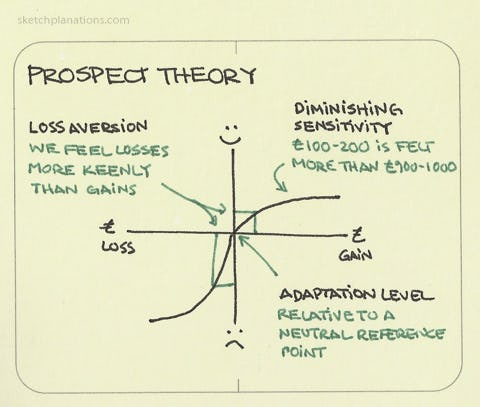

[KTO: Model Alignment as Prospect Theoretic Optimization](https://arxiv.org/pdf/2402.01306)

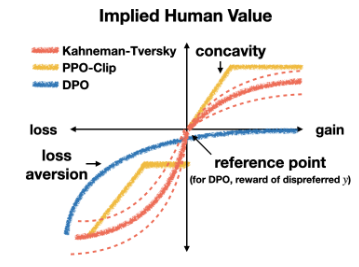

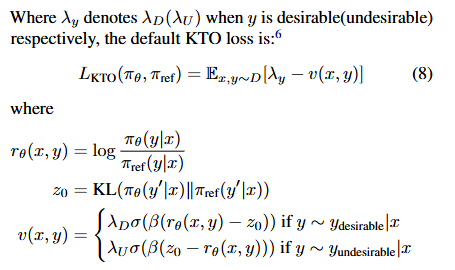

### Проблемы и ограничения RLHF

**Reward Hacking** - модель учится обманывать reward-модель

**Коллапс разнообразия** - Ответы становятся шаблонными

**Зависимость от качества данных** - "Мусор на входе → мусор на выходе"

**Этические аспекты**: что и куда выравнивать?